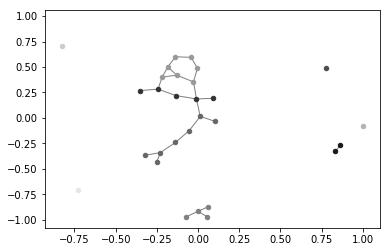

In [1]:
import community
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
# G = nx.erdos_renyi_graph(30, 0.05)

# #first compute the best partition
# partition = community.best_partition(G)

# #drawing
# size = float(len(set(partition.values())))
# pos = nx.spring_layout(G)
# count = 0.
# for com in set(partition.values()) :
#     count = count + 1.
#     list_nodes = [nodes for nodes in partition.keys()
#                                 if partition[nodes] == com]
#     nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
#                                 node_color = str(count / size))


# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.show()

In [2]:
import pickle
items_set=pickle.load(open('../data/processed_data/item_set','rb'))  # 2819 Games (that appear in >= 1 bundle)
bundle_item_map=pickle.load(open('../data/processed_data/bundle_item_map','rb'))  # 615 bundles
user_bundle_map=pickle.load(open('../data/processed_data/user_bundle_map','rb'))  # 29634 Users who purchased >= 1 bundle
user_item_map=pickle.load(open('../data/processed_data/user_item_map','rb'))  # 29634 Users who purchased >= 1 bundle

In [3]:
from itertools import combinations

G = nx.Graph()
for item in items_set:
    G.add_node(item)
for b, items in bundle_item_map.iteritems():
    for edge in combinations(items, 2):
        G.add_edge(edge[0], edge[1])

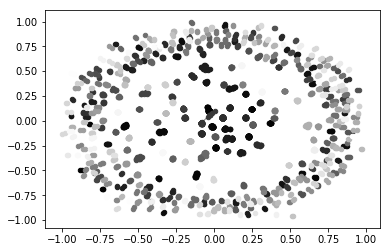

In [52]:
#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [53]:
community.modularity(partition, G)

0.9516566097932921

### TSNE Projection colored by purchase count

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter

item_features = np.load('item_features.npy', allow_pickle=True)

In [66]:
item_purchase_cnt = Counter()
for _, b in user_bundle_map.iteritems():
    for b_id in b:
        for item in bundle_item_map[b_id]:
            item_purchase_cnt[item] += 1

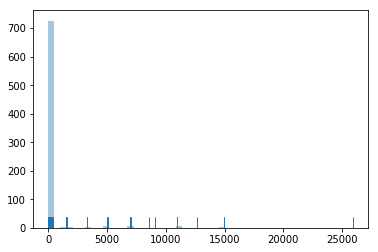

In [69]:
g = sns.distplot(pd.Series(dict(item_purchase_cnt)).values, kde=False, rug=True)
# g.set_title("Distribution of bundle purchases")

In [26]:
X = item_features.tolist().values()

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [31]:
X_2d = tsne.fit_transform(X)

In [86]:
def map_to_label(cnt):
    if cnt < 2:
        return 0
#     elif cnt < 2000:
#         return 1
#     elif cnt < 10000:
#         return 2
    else:
        return 1
    
y = np.array([map_to_label(item_purchase_cnt[i]) for i in range(len(X))])

(0, 'r')
(1, 'g')


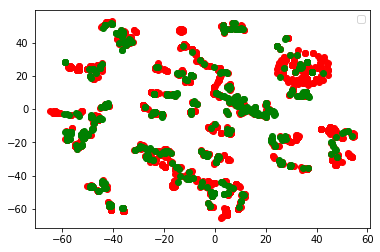

In [87]:
for i, c in zip(range(2), colors):
    print(i, c)
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c)
plt.legend()
plt.show()

In [46]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple', 'grey'
target_ids = range(max(y))
for i, c in zip(range(5), colors):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c)
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2819 but corresponding boolean dimension is 30

<Figure size 432x360 with 0 Axes>

## Snap Node Dist

In [1]:
import snap

def loadNet(path='snap_edge_list.txt'):
    Graph = snap.LoadEdgeList(snap.PUNGraph, path, 0, 1)
    # remove self edges
    for edge in Graph.Edges():
        if edge.GetSrcNId() == edge.GetDstNId():
            Graph.DelEdge(edge.GetSrcNId(), edge.GetDstNId())
#     assert (Graph.GetEdges() == 14484)
    return Graph


def getDataPointsToPlot(Graph):
    deg_d = Counter()
    for node in Graph.Nodes():
        deg = node.GetDeg()
        deg_d[deg] += 1
    N = Graph.GetNodes()
    if 0 in deg_d:
        del deg_d[0]  # filter out nodes with 0 degrees
    deg_s = pd.Series(deg_d).sort_index(ascending=True)
    X = [k for k in deg_s.index]
    Y = [i*1.0 / N for i in deg_s.values]
    return X, Y

ImportError: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.27' not found (required by /home/zhenz/miniconda2/lib/python2.7/site-packages/_snap.so)

In [ ]:
x, y = getDataPointsToPlot(loadNet())